# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## Sect3. Cost 최소화기법, How to minimize cost

In [1]:
from tqdm import tqdm_notebook
from images import bigpycraft_copy as bpc

## <font color='brown'> Cost minimize 1 </font>
<!-- lab03_minimize01.py -->

## 간단한 가설, Linear Model

### Our hypothesis for linear model X * W
> hypothesis = X * W
<br><br><br>
$$H(x) = Wx$$

### cost/loss function
> cost = tf.reduce_mean(tf.square(hypothesis - Y))
<br><br><br>
$$cost(W) = \frac{1}{m} \sum^m_{i=1}(H(x^{(i)}-y^{(i)})^2$$

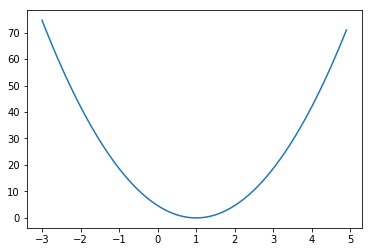

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()


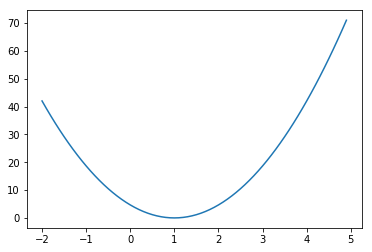

In [3]:
# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-20, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

## <font color='brown'> Cost minimize 2 </font>
<!-- lab03_minimize02.py -->

## Gradient descent

$$cost(W) = \frac{1}{m} \sum^m_{i=1}(H(x^{(i)}-y^{(i)})^2$$

$$W := W - a\frac{1}{m} \sum^m_{i=1}(Wx^{(i)}-y^{(i)})x^{(i)}$$

<hr>
``` python 
# Our hypothesis for linear model X * W
    hypothesis = X * W

# cost/loss function
    cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
    learning_rate = 0.1
    gradient = tf.reduce_mean((W * X - Y) * X)
    descent = W - learning_rate * gradient
    update = W.assign(descent)
    
```

<hr>
``` python 
# tf.reduce_sum

Signature: tf.reduce_sum(input_tensor, axis=None, keepdims=None, name=None, reduction_indices=None, keep_dims=None)
Docstring:
Computes the sum of elements across dimensions of a tensor. (deprecated arguments)

For example:
    x = tf.constant([[1, 1, 1], [1, 1, 1]])
    tf.reduce_sum(x)  # 6
    tf.reduce_sum(x, 0)  # [2, 2, 2]
    tf.reduce_sum(x, 1)  # [3, 3]
    tf.reduce_sum(x, 1, keepdims=True)  # [[3], [3]]
    tf.reduce_sum(x, [0, 1])  # 6

Returns:
  The reduced tensor, of the same dtype as the input_tensor.

```

<hr>
``` python
# tf.reduce_mean

Signature: tf.reduce_mean(input_tensor, axis=None, keepdims=None, name=None, reduction_indices=None, keep_dims=None)
Docstring:
Computes the mean of elements across dimensions of a tensor. (deprecated arguments)

For example:
    x = tf.constant([[1., 1.], [2., 2.]])
    tf.reduce_mean(x)  # 1.5
    tf.reduce_mean(x, 0)  # [1.5, 1.5]
    tf.reduce_mean(x, 1)  # [1.,  2.]

Returns:
  The reduced tensor.

```

<hr>
``` python
# W.assign(descent)

Signature: W.assign(value, use_locking=False)
Docstring:
Assigns a new value to the variable.
```

In [4]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))    
    print("step={step},   \t sess_cost={sess_cost},    \t W={sess_W}".format(
            step=step, 
            sess_cost=sess.run(cost, feed_dict={X: x_data, Y: y_data}), 
            sess_W=sess.run(W)
    ));


step=0,   	 sess_cost=7.318831443786621,    	 W=[ 0.27696911]
step=1,   	 sess_cost=2.0818004608154297,    	 W=[ 0.61438358]
step=2,   	 sess_cost=0.5921565294265747,    	 W=[ 0.79433793]
step=3,   	 sess_cost=0.16843563318252563,    	 W=[ 0.89031357]
step=4,   	 sess_cost=0.047910649329423904,    	 W=[ 0.94150054]
step=5,   	 sess_cost=0.01362789236009121,    	 W=[ 0.96880031]
step=6,   	 sess_cost=0.0038763864431530237,    	 W=[ 0.98336017]
step=7,   	 sess_cost=0.00110260967630893,    	 W=[ 0.99112546]
step=8,   	 sess_cost=0.0003136293962597847,    	 W=[ 0.99526691]
step=9,   	 sess_cost=8.920951950130984e-05,    	 W=[ 0.99747568]
step=10,   	 sess_cost=2.5374476535944268e-05,    	 W=[ 0.99865371]
step=11,   	 sess_cost=7.216773155960254e-06,    	 W=[ 0.999282]
step=12,   	 sess_cost=2.053352318398538e-06,    	 W=[ 0.99961704]
step=13,   	 sess_cost=5.840662993250589e-07,    	 W=[ 0.99979573]
step=14,   	 sess_cost=1.662036765992525e-07,    	 W=[ 0.99989104]
step=15,   	 sess_cost=

## <font color='brown'> Cost minimize 3 </font>
<!-- lab03_minimize03.py -->

<hr>
``` python
# tf.train.GradientDescentOptimizer(learning_rate=0.1)

Init signature: tf.train.GradientDescentOptimizer(learning_rate, use_locking=False, name='GradientDescent')
Docstring:     
Optimizer that implements the gradient descent algorithm.
  
Init docstring:
Construct a new gradient descent optimizer.

Args:
  learning_rate: A Tensor or a floating point value.  The learning
    rate to use.
  use_locking: If True use locks for update operations.
  name: Optional name prefix for the operations created when applying
    gradients. Defaults to "GradientDescent".
    
```

<hr>
``` python
# optimizer.minimize(cost)

Signature: optimizer.minimize(loss, global_step=None, var_list=None, gate_gradients=1, aggregation_method=None, colocate_gradients_with_ops=False, name=None, grad_loss=None)
Docstring:
Add operations to minimize `loss` by updating `var_list`.

This method simply combines calls `compute_gradients()` and
`apply_gradients()`. If you want to process the gradient before applying
them call `compute_gradients()` and `apply_gradients()` explicitly instead
of using this function.

Returns:
  An Operation that updates the variables in `var_list`.  If `global_step`
  was not `None`, that operation also increments `global_step`.

Raises:
  ValueError: If some of the variables are not `Variable` objects.
    
```


In [5]:
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()


In [6]:
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

W_val = []
step_val = []

for step in tqdm_notebook(range(101)):
    W_val.append(sess.run(W))
    step_val.append(step)
    
    if step % 10 == 0 or step < 10:
        # print(step, sess.run(W))
        print("step={step}, \t W={W_val}".format(
            step=step, W_val=sess.run(W)
        )); 
                
    sess.run(train)
    

A Jupyter Widget

step=0, 	 W=5.0
step=1, 	 W=1.2666664123535156
step=2, 	 W=1.0177778005599976
step=3, 	 W=1.0011851787567139
step=4, 	 W=1.0000790357589722
step=5, 	 W=1.0000052452087402
step=6, 	 W=1.0000003576278687
step=7, 	 W=1.0
step=8, 	 W=1.0
step=9, 	 W=1.0
step=10, 	 W=1.0
step=20, 	 W=1.0
step=30, 	 W=1.0
step=40, 	 W=1.0
step=50, 	 W=1.0
step=60, 	 W=1.0
step=70, 	 W=1.0
step=80, 	 W=1.0
step=90, 	 W=1.0
step=100, 	 W=1.0



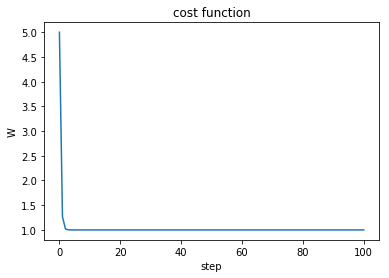

In [7]:
# Show the cost function
plt.plot(step_val, W_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('W')
plt.show()

In [8]:
type(train)

tensorflow.python.framework.ops.Operation

In [9]:
# lab03_minimize03.py
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [2, 4, 6]

# Set wrong model weights
W = tf.Variable(-7.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# tensorboard for graph
writer = tf.summary.FileWriter("./graph/sect03", sess.graph)


In [10]:
sess.graph

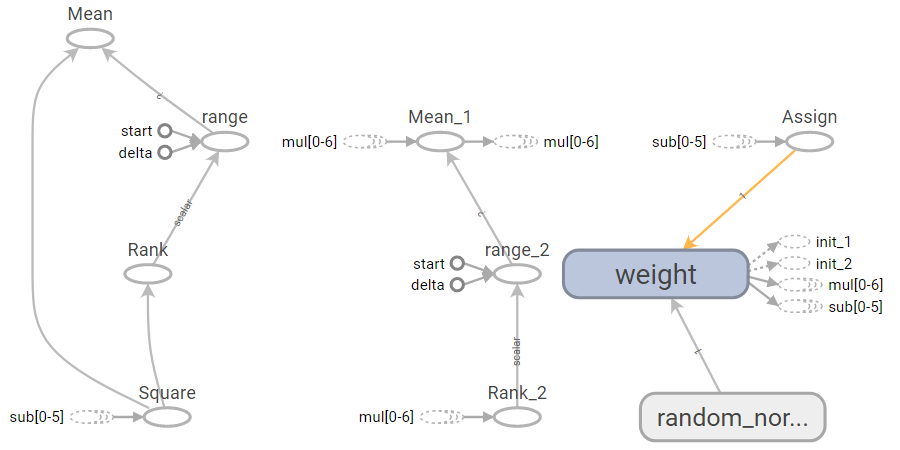

In [11]:
bpc.Figure(bpc.ML03_IMG_01)

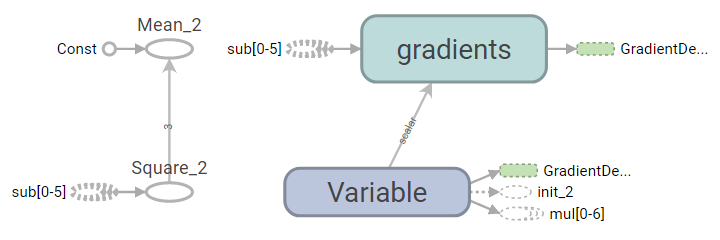

In [12]:
bpc.Figure(bpc.ML03_IMG_02)

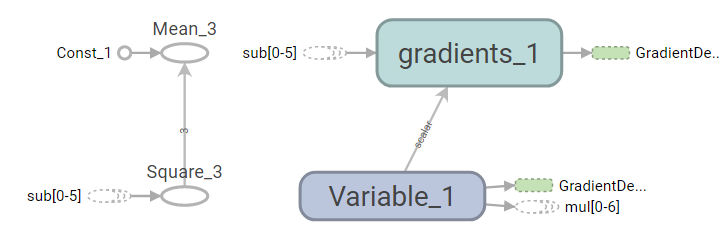

In [13]:
bpc.Figure(bpc.ML03_IMG_03)

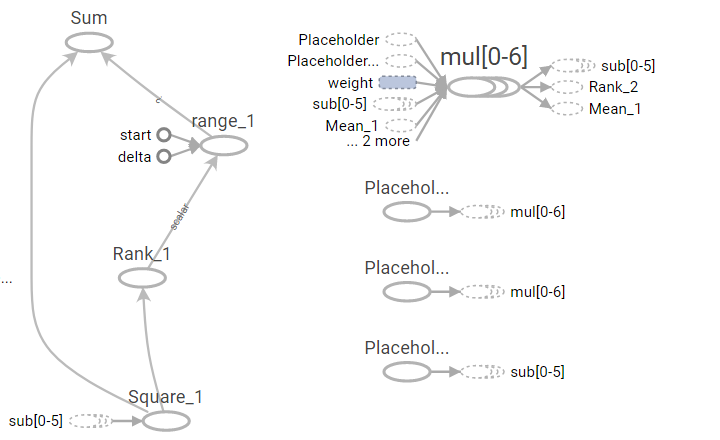

In [14]:
bpc.Figure(bpc.ML03_IMG_04)

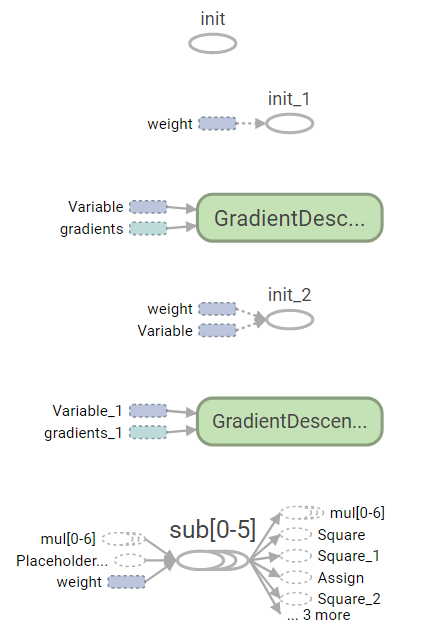

In [15]:
bpc.Figure(bpc.ML03_IMG_05)

In [16]:
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(101)):
    
    if step % 10 == 0 or step < 10:
        # print(step, sess.run(W))
        print("step={step}, \t W={W_val}".format( 
            step=step, W_val=sess.run(W)
        ));    
    sess.run(train)

A Jupyter Widget

step=0, 	 W=-7.0
step=1, 	 W=1.4000005722045898
step=2, 	 W=1.9600000381469727
step=3, 	 W=1.997333288192749
step=4, 	 W=1.9998222589492798
step=5, 	 W=1.999988079071045
step=6, 	 W=1.9999991655349731
step=7, 	 W=1.9999998807907104
step=8, 	 W=2.0
step=9, 	 W=2.0
step=10, 	 W=2.0
step=20, 	 W=2.0
step=30, 	 W=2.0
step=40, 	 W=2.0
step=50, 	 W=2.0
step=60, 	 W=2.0
step=70, 	 W=2.0
step=80, 	 W=2.0
step=90, 	 W=2.0
step=100, 	 W=2.0



In [17]:
W_val = sess.run(W)
W_val

2.0

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>